In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

In [87]:
symbol = "EUR_USD_Ask"
start = "2019-01-01"
end = "2020-08-30"
tc = 0.000059
granularity = '1h'

In [88]:
def get_data():
    raw = pd.read_csv("EUR_USD.csv", parse_dates = ["time"], index_col = "time", usecols=[0,1])
    raw = raw["EUR_USD_Ask"].to_frame().dropna() 
    raw = raw.loc[f'{start} 00:00:00': f'{end} 23:59:00'].copy()
    raw.rename(columns={"EUR_USD_Ask": "price"}, inplace=True)
    raw = raw.resample(granularity, label='right').last().ffill().iloc[:-1]
    raw["returns"] = np.log(raw / raw.shift(1))
    data = raw
    return data

In [89]:
data = get_data()

In [90]:
data.head()

,price,returns
time,,
2019-01-01 23:00:00+00:00,1.14680,NaN
2019-01-02 00:00:00+00:00,1.14622,-0.000506
2019-01-02 01:00:00+00:00,1.14573,-0.000428
2019-01-02 02:00:00+00:00,1.14531,-0.000367
2019-01-02 03:00:00+00:00,1.14465,-0.000576


In [91]:

ARIMA_model = ARIMA(data['price'], order=(4,1,6))
model_fit = ARIMA_model.fit()


c:\Users\Nikos\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [92]:
data['ARIMA_forecast'] = model_fit.predict()
data

,price,returns,ARIMA_forecast
time,,,
2019-01-01 23:00:00+00:00,1.14680,NaN,0.000000
2019-01-02 00:00:00+00:00,1.14622,-0.000506,1.146800
2019-01-02 01:00:00+00:00,1.14573,-0.000428,1.145694
2019-01-02 02:00:00+00:00,1.14531,-0.000367,1.145209
2019-01-02 03:00:00+00:00,1.14465,-0.000576,1.144773
...,...,...,...
2020-08-30 19:00:00+00:00,1.19061,0.000000,1.190610
2020-08-30 20:00:00+00:00,1.19061,0.000000,1.190610
2020-08-30 21:00:00+00:00,1.19061,0.000000,1.190610


In [93]:
data['ARIMA_returns'] = data['ARIMA_forecast'] - data['price'].shift(1)
data

,price,returns,ARIMA_forecast,ARIMA_returns
time,,,,
2019-01-01 23:00:00+00:00,1.14680,NaN,0.000000,NaN
2019-01-02 00:00:00+00:00,1.14622,-0.000506,1.146800,1.738210e-11
2019-01-02 01:00:00+00:00,1.14573,-0.000428,1.145694,-5.261244e-04
2019-01-02 02:00:00+00:00,1.14531,-0.000367,1.145209,-5.206733e-04
2019-01-02 03:00:00+00:00,1.14465,-0.000576,1.144773,-5.372166e-04
...,...,...,...,...
2020-08-30 19:00:00+00:00,1.19061,0.000000,1.190610,0.000000e+00
2020-08-30 20:00:00+00:00,1.19061,0.000000,1.190610,0.000000e+00
2020-08-30 21:00:00+00:00,1.19061,0.000000,1.190610,0.000000e+00


In [94]:
data.dropna(inplace=True)
data["ARIMA_position"] = np.sign(data['ARIMA_returns'])
data

,price,returns,ARIMA_forecast,ARIMA_returns,ARIMA_position
time,,,,,
2019-01-02 00:00:00+00:00,1.14622,-0.000506,1.146800,1.738210e-11,1.0
2019-01-02 01:00:00+00:00,1.14573,-0.000428,1.145694,-5.261244e-04,-1.0
2019-01-02 02:00:00+00:00,1.14531,-0.000367,1.145209,-5.206733e-04,-1.0
2019-01-02 03:00:00+00:00,1.14465,-0.000576,1.144773,-5.372166e-04,-1.0
2019-01-02 04:00:00+00:00,1.14464,-0.000009,1.144179,-4.714843e-04,-1.0
...,...,...,...,...,...
2020-08-30 19:00:00+00:00,1.19061,0.000000,1.190610,0.000000e+00,0.0
2020-08-30 20:00:00+00:00,1.19061,0.000000,1.190610,0.000000e+00,0.0
2020-08-30 21:00:00+00:00,1.19061,0.000000,1.190610,0.000000e+00,0.0


In [95]:
trading_costs = 0.000059

In [96]:
data["strategy"] = data["ARIMA_position"].shift(1) * data["returns"]
data["trades"] = data.ARIMA_position.diff().fillna(0).abs()
data.dropna(inplace=True)
data['strategy_net'] = data.strategy - data.trades * trading_costs

data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [97]:
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [98]:
data

,price,returns,ARIMA_forecast,ARIMA_returns,ARIMA_position,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
time,,,,,,,,,,,
2019-01-02 01:00:00+00:00,1.14573,-0.000428,1.145694,-0.000526,-1.0,-0.000428,2.0,-0.000546,0.999573,0.999573,0.999455
2019-01-02 02:00:00+00:00,1.14531,-0.000367,1.145209,-0.000521,-1.0,0.000367,0.0,0.000367,0.999206,0.999939,0.999821
2019-01-02 03:00:00+00:00,1.14465,-0.000576,1.144773,-0.000537,-1.0,0.000576,0.0,0.000576,0.998630,1.000516,1.000398
2019-01-02 04:00:00+00:00,1.14464,-0.000009,1.144179,-0.000471,-1.0,0.000009,0.0,0.000009,0.998622,1.000524,1.000406
2019-01-02 05:00:00+00:00,1.14457,-0.000061,1.144078,-0.000562,-1.0,0.000061,0.0,0.000061,0.998560,1.000586,1.000467
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 19:00:00+00:00,1.19061,0.000000,1.190610,0.000000,0.0,0.000000,0.0,0.000000,1.038727,0.938349,0.587686
2020-08-30 20:00:00+00:00,1.19061,0.000000,1.190610,0.000000,0.0,0.000000,0.0,0.000000,1.038727,0.938349,0.587686
2020-08-30 21:00:00+00:00,1.19061,0.000000,1.190610,0.000000,0.0,0.000000,0.0,0.000000,1.038727,0.938349,0.587686


In [99]:
perf = data["cstrategy"].iloc[-1] # absolute performance
outperf = perf - data["creturns"].iloc[-1]
print(perf, outperf)

0.9383488543113973 -0.10067506779779267


<AxesSubplot:title={'center':'arima'}, xlabel='time'>

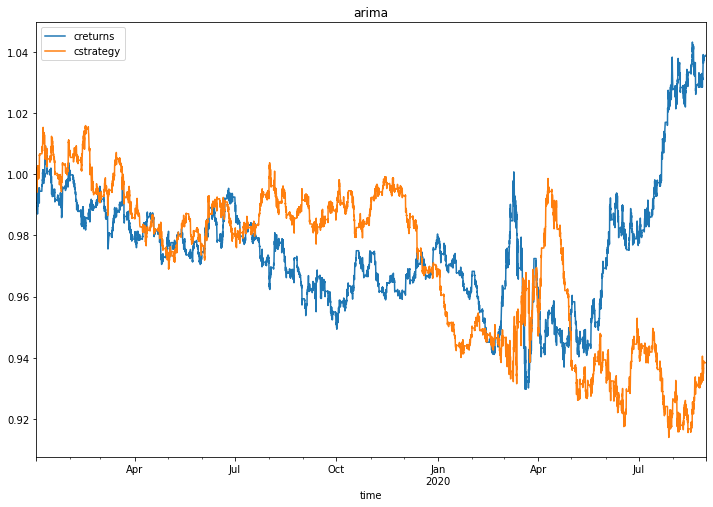

In [100]:
results = data 
results[["creturns", "cstrategy"]].plot(title='arima', figsize=(12, 8))

<AxesSubplot:title={'center':'arima'}, xlabel='time'>

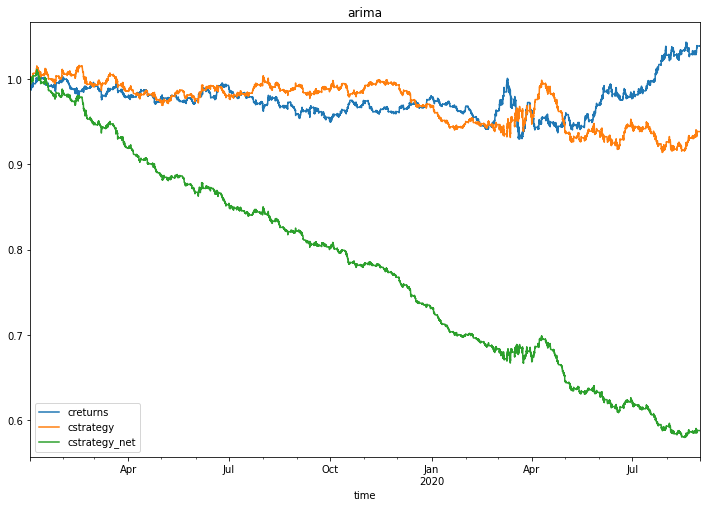

In [101]:
results[["creturns", "cstrategy","cstrategy_net"]].plot(title='arima', figsize=(12, 8))